<a href="https://colab.research.google.com/github/Steve-siddu/Machine-Learning/blob/main/EDA_on_Crop_Production_by_Indian_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

In [ ]:
df = pd.read_csv('/content/sample_data/crop_production.csv')

In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
103163,Madhya Pradesh,BALAGHAT,2000,Rabi,Safflower,6.0,1.0
103164,Madhya Pradesh,BALAGHAT,2000,Rabi,Wheat,14004.0,9796.0
103165,Madhya Pradesh,BALAGHAT,2000,Whole Year,Coriander,291.0,65.0
103166,Madhya Pradesh,BALAGHAT,2000,Whole Year,Dry chillies,405.0,72.0
103167,Madhya Pradesh,BALAGHAT,2000,Whole Year,Garlic,131.0,449.0


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,103168.000000,103168.000000,1.009830e+05
mean,2005.893455,9081.339826,1.196607e+06
std,4.931049,30605.983819,2.528363e+07
min,1997.000000,0.040000,0.000000e+00
25%,2002.000000,87.000000,1.000000e+02
50%,2006.000000,566.000000,7.760000e+02
75%,2010.000000,3652.000000,6.771500e+03
max,2014.000000,877029.000000,1.125000e+09


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
State_Name,103168,17,Karnataka,21122
District_Name,103168,282,BIJAPUR,945
Season,103168,6,Kharif,38069
Crop,103168,101,Rice,7169


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       2185
dtype: int64

In [ ]:
df.isnull().mean()*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       2.117905
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df.rename(columns={
    'State_Name': 'state',
    'District_Name': 'district',
    'Crop_Year': 'year',
    'Season': 'season',
    'Crop': 'crop',
    'Area': 'area',
    'Production': 'production'
    }, inplace=True)

In [ ]:
def state_wise_production_chart(df):
  state_prod_df = df[['state', 'production']]
  groupby_state = state_prod_df.groupby('state')
  cumulative_production = groupby_state.sum()
  cumulative_production = cumulative_production.reset_index()
  print(type(cumulative_production))
  print('state' in cumulative_production)
  print(cumulative_production.shape)
  # Calculate production in top 10 states
  print(cumulative_production.head())
  top10 = cumulative_production.nlargest(3, 'production')
  print(type(top10))
  print('state' in top10)
  print(top10.shape)
  # print(top10.head())
  other = pd.DataFrame({'state': ['Other'], 'production': [cumulative_production['production'].sum() - top10['production'].sum()]})
  top10 = pd.concat([top10, other])
  print(top10.head(11))
  print(top10.columns)
  # Create pie chart
  plt.pie(top10['production'], labels=top10['state'], autopct='%1.1f%%')
  plt.title('Production in Top 10 States')
  plt.legend(loc='upper left', bbox_to_anchor=(4.0,1.0))
  plt.show()
  # cum_prod_by_state_index = cum_prod_by_state['production'].nsmallest(10).index
  # print("Columns are ", cum_prod_by_state.columns)
  # print(cum_prod_by_state.iloc[10:, 0].head(10))
  # cum_prod_by_state.iloc[10:, 0] = "Others"
  # cum_prod_by_state['production'].plot.pie(label='Production Distribution', title='State wise production', legend=True)
  # plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
  # plt.show()
  # plt.figure(figsize = (20, 12))
  # sns.distplot(cum_prod_by_state['production'], kde=False)
  # print(cum_prod_by_state.head(17))

<class 'pandas.core.frame.DataFrame'>
True
(33, 2)
                         state    production
0  Andaman and Nicobar Islands  7.182232e+08
1               Andhra Pradesh  1.732459e+10
2            Arunachal Pradesh  6.823913e+06
3                        Assam  2.111752e+09
4                        Bihar  3.664836e+08
<class 'pandas.core.frame.DataFrame'>
True
(3, 2)
             state    production
15          Kerala  9.788005e+10
1   Andhra Pradesh  1.732459e+10
27      Tamil Nadu  1.207644e+10
0            Other  1.389504e+10
Index(['state', 'production'], dtype='object')


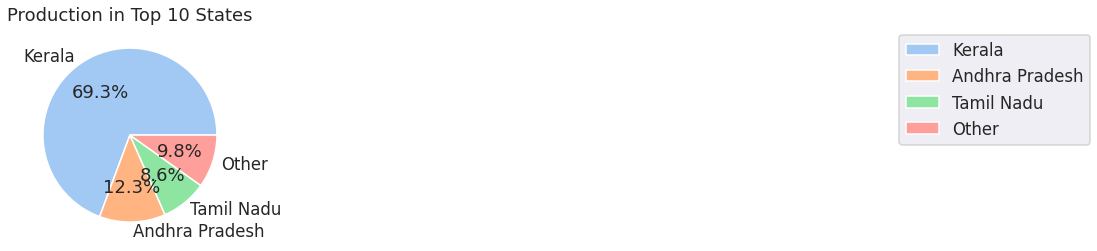

In [ ]:
state_wise_production_chart(df)

In [ ]:
def top_producing_crops_in_top5_states(df):
  top5_states = df[['state', 'production']].groupby('state', as_index=False).sum().nlargest(5, 'production')
  print(type(top5_states))
  print(top5_states.shape, top5_states.columns)
  print(top5_states.head())

  # top5_states data
  state_prod_df = df[['state', 'crop','production']]
  state_prod_df = state_prod_df[state_prod_df['state'].isin(top5_states['state'])]
  state_prod_df = state_prod_df.groupby(['state', 'crop'], as_index=False).sum()  # .nlargest(5, 'production')
  # print(state_prod_df.columns)
  # print(state_prod_df.shape)
  # print(type(state_prod_df))
  # print("state_prod_df.nunique()['crop']", state_prod_df.nunique()['crop'])
  total_crops_in_top5_states = state_prod_df.nunique()['crop']
  # print(state_prod_df.describe(include='object'))
  # top5_crops_in_top5_states
  top5_crops_in_top5_states = state_prod_df.groupby('crop', as_index=False).sum().sort_values('production', ascending=True).nsmallest(total_crops_in_top5_states-5, 'production')
  print("top5_crops_in_top5_states")
  print(type(top5_crops_in_top5_states))
  print(top5_crops_in_top5_states.shape, top5_crops_in_top5_states.columns)
  print(top5_crops_in_top5_states.head())
  print(top5_crops_in_top5_states.tail())
  # top5_crops_in_top5_states = top5_crops_in_top5_states.to_frame()
  print(type(top5_crops_in_top5_states))
  print("state_crop_prod_df")
  state_crop_prod_df = df[['state', 'crop','production']]
  state_crop_prod_df = state_crop_prod_df[state_crop_prod_df['state'].isin(top5_states['state'])]
  state_crop_prod_df.loc[state_crop_prod_df['crop'].isin(top5_crops_in_top5_states['crop']), 'crop'] = 'others'
  print("state_crop_prod_df")
  print(type(state_crop_prod_df))
  print(state_crop_prod_df.nunique())
  print(state_crop_prod_df.shape, state_crop_prod_df.columns)
  print(state_crop_prod_df.head())


  # groupby_state = groupby_state[groupby_state['state'].isin(top5['state'])]
  # groupby_state = state_prod_df.groupby('state')

  # print(type(groupby_state))
  # print('state' in groupby_state)
  # print('crop' in groupby_state)

  # print(groupby_state.columns)

  # cumulative_production = groupby_state.sum()
  # cumulative_production = cumulative_production
  # print(type(cumulative_production))
  # print('state' in cumulative_production)
  # print(cumulative_production.shape)
  # print(cumulative_production.columns)
  # print(cumulative_production.head())
  # print(cumulative_production.tail())
  grouped_df = state_crop_prod_df.groupby(['state', 'crop'])['production'].sum().unstack()

  # Plot the stacked bar chart
  fig, ax = plt.subplots(figsize=(10, 6))
  grouped_df.plot(kind='bar', stacked=True, ax=ax)

  # Set the chart title and axis labels
  ax.set_title('Crops grown in each state')
  ax.set_xlabel('State')
  ax.set_ylabel('Production')

  # Show the legend
  ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

  # Show the chart
  plt.show()
  # plt.figure(figsize = (10, 4.5))
  # sns.barplot(x='state', y='production', hue='crop', data=state_crop_prod_df)

<class 'pandas.core.frame.DataFrame'>
(5, 2) Index(['state', 'production'], dtype='object')
             state    production
15          Kerala  9.788005e+10
1   Andhra Pradesh  1.732459e+10
27      Tamil Nadu  1.207644e+10
30   Uttar Pradesh  3.234493e+09
3            Assam  2.111752e+09
top5_crops_in_top5_states
<class 'pandas.core.frame.DataFrame'>
(104, 2) Index(['crop', 'production'], dtype='object')
                  crop  production
0                Apple         0.0
47              Litchi         0.0
60  Other Citrus Fruit         0.0
66               Peach         0.0
67                Pear         0.0
               crop    production
37        Groundnut  3.872227e+07
98  Total foodgrain  3.970837e+07
48            Maize  5.249572e+07
5            Banana  9.394726e+07
94          Tapioca  1.040316e+08
<class 'pandas.core.frame.DataFrame'>
state_crop_prod_df
state_crop_prod_df
<class 'pandas.core.frame.DataFrame'>
state             5
crop              6
production    23969
dty

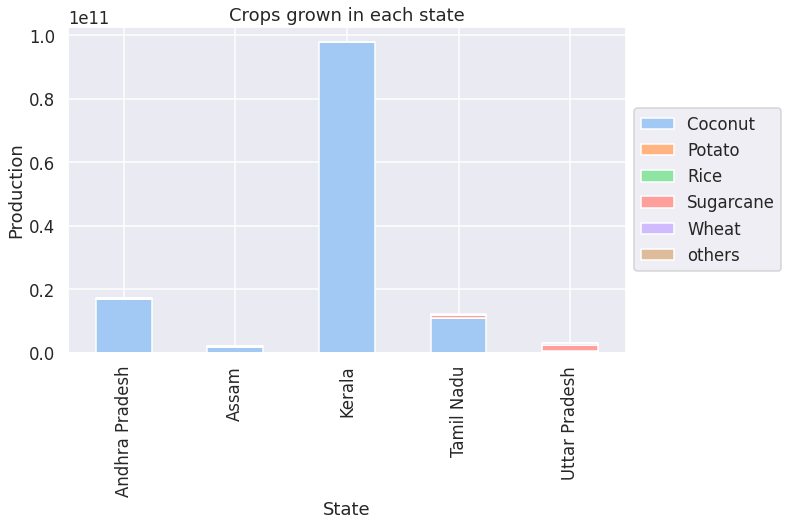

In [ ]:
top_producing_crops_in_top5_states(df)